In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['target_names', 'DESCR', 'feature_names', 'target', 'data']

In [14]:
X = iris["data"][:,3:]   # petal width

In [26]:
y = (iris["target"] == 2).astype(int)   # 1 if Iris-Virginica, else 0

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

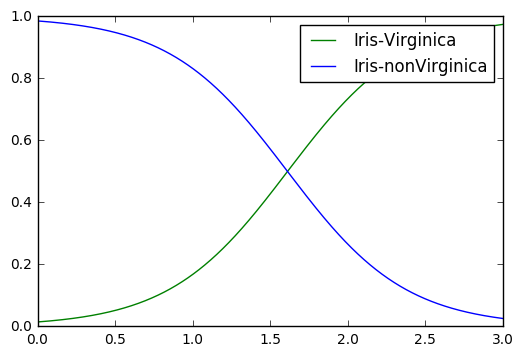

In [46]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_prob[:,0], "b-", label="Iris-nonVirginica")
plt.legend()

### Exercise: implement batch gradient descent with early stopping for softmax regression 
without using Scikit-Learn

In [2]:
# Load the data
iris = datasets.load_iris()

In [179]:
X = iris.data[:,(2,3)]    # Use only patel width and length
y = iris.target
print(X.shape, y.shape)

(150, 2) (150,)


In [4]:
# Pad X with ones for learning the bias term
X_pad = np.c_[(np.ones(X.shape[0]), X)]

In [5]:
# Modify y into one-hot coding so that we could perform multiclass classficiation with soft-max indicating the probabitliy
def one_hot(y):
    
    y_one_hot = np.zeros((len(y), np.unique(y).shape[0]))

    y_one_hot[np.arange(len(y)), y]= 1
    
    return y_one_hot

In [116]:
# Split the data into training, valdation and testing
np.random.seed(606)
rand_idx = np.random.permutation(y.shape[0])

train_idx = rand_idx[:int(rand_idx.shape[0] * 0.6)]
test_idx = rand_idx[int(rand_idx.shape[0] * 0.6):int(rand_idx.shape[0] * 0.8)]
vali_idx = rand_idx[int(rand_idx.shape[0] * 0.8):]

X_train = X_pad[train_idx, :]
y_train = y[train_idx]
y_train_hot = one_hot(y_train)
X_vali = X_pad[vali_idx, :]
y_vali = y[vali_idx]
y_vali_hot = one_hot(y_vali)
X_test = X_pad[test_idx, :] 
y_test = y[test_idx]
y_test_hot = one_hot(y_test)

In [117]:
y_train_hot.shape

(90, 3)

In [118]:
# Define key functions
def softmax(y):
    exps = np.exp(y)
    exp_sums = np.sum(exps, axis=1).reshape(-1,1).dot(np.ones((1,3)))
    
    return exps/exp_sums

def cross_entropy_loss(y_pred, y_target):
    # Get the log of y_pred
    log_y_pred = np.log(y_pred)
    # Get the loss 
    loss = -np.sum(log_y_pred * y_target, axis=1)
    # Get the cost
    cost = np.mean(loss, axis=0)
    return cost

def cost_l2(theta):
    l2_cost = 1/2*np.sum(np.square(theta[1:, :]))
    return l2_cost

def gradient(y_pred, y_target, X):
    m = X.shape[0]
    error = y_pred - y_target
    grad = X.T.dot(error)/m
    return grad

# Test making predictions with validation set and evaluate the accuracy
def accuracy(X_vali, theta, y_vali):
    y_pred = softmax(X_vali.dot(theta))
    vali_idx = np.argmax(y_pred, axis=1)
    acc_per = np.mean(np.equal(vali_idx, y_vali))
    return acc_per

In [119]:
theta = np.random.randn(n_input, n_output)

In [120]:
accuracy(X_test, theta, y_test)

0.33333333333333331

In [127]:
# Impletment batch gradient descent
lr = 0.1
iteration = 5001
n_input = X_train.shape[1]
n_output = y_train_hot.shape[1]
alpha = 0.1

for i in range(iteration):
    y_pred = softmax(X_train.dot(theta))
    cost = cross_entropy_loss(y_pred, y_train_hot)
    grad = gradient(y_pred, y_train_hot, X_train)
    if i % 1000 == 0:
        print(i, cost)
    theta = theta - lr * grad

0 0.358919862403
1000 0.218335255516
2000 0.178610433702
3000 0.156646911213
4000 0.141760702447
5000 0.130657773315


In [128]:
accuracy(X_vali, theta, y_vali)

0.90000000000000002

In [129]:
theta = np.random.randn(n_input, n_output)

In [130]:
# Impletment batch gradient descent with l2 regularization
lr = 0.1
iteration = 5001
n_input = X_train.shape[1]
n_output = y_train_hot.shape[1]
alpha = 0.1

for i in range(iteration):
    y_pred = softmax(X_train.dot(theta))
    cost = cross_entropy_loss(y_pred, y_train_hot) + alpha*cost_l2(theta)
    grad = gradient(y_pred, y_train_hot, X_train) + np.r_[np.zeros((1, n_output)), alpha*theta[1:,:]]
    if i % 1000 == 0:
        print(i, cost)
    theta = theta - lr * grad

0 1.84996554469
1000 0.503117019236
2000 0.492678271055
3000 0.490948681371
4000 0.490606455696
5000 0.490534619353


In [131]:
theta

array([[ 4.36710871,  0.34702931, -4.48154018],
       [-1.08519154,  0.17992806,  0.90526348],
       [-0.42160514, -0.19999242,  0.62159756]])

In [132]:
accuracy(X_vali, theta, y_vali)

0.96666666666666667

In [151]:
# Track the development of cost and validation error
# Impletment batch gradient descent with l2 regularization
theta = np.random.randn(n_input, n_output)
lr = 0.1
iteration = 50001
n_input = X_train.shape[1]
n_output = y_train_hot.shape[1]
alpha = 0.1
best_loss = np.infty

for i in range(iteration):
    y_pred = softmax(X_train.dot(theta))
    cost = cross_entropy_loss(y_pred, y_train_hot) + alpha*cost_l2(theta)
    grad = gradient(y_pred, y_train_hot, X_train) + np.r_[np.zeros((1, n_output)), alpha*theta[1:,:]]
    theta = theta - lr * grad
    
    # Calculate the validation loss 
    y_pred_vali = softmax(X_vali.dot(theta))
    vali_loss = cross_entropy_loss(y_pred_vali, y_vali_hot)
    if i % 5000 == 0:
        print(i, cost)
    
    if vali_loss < best_loss:
        best_loss = vali_loss
    else:
        print('Early stopping!')
        break

0 3.80831332117
5000 0.490534776457
10000 0.490514878994
15000 0.49051486902
20000 0.490514869014
25000 0.490514869014
30000 0.490514869014
35000 0.490514869014
Early stopping!


In [152]:
accuracy(X_vali, theta, y_vali)

0.96666666666666667

In [159]:
# Plot the final results
# Get the range of the two features:
x0_min = np.min(X[:,0])
x0_max = np.max(X[:,0])
x1_min = np.min(X[:,1])
x1_max = np.max(X[:,1])
print([x0_min, x0_max, x1_min, x1_max])

[1.0, 6.9000000000000004, 0.10000000000000001, 2.5]


In [157]:
np.max(X[:,0])

6.9000000000000004

In [160]:
x0, x1 = np.meshgrid(np.linspace(x0_min,x0_max, 1000), np.linspace(x1_min, x1_max, 500))
X_mesh = np.c_[x0.ravel(), x1.ravel()]

In [188]:
# Pad X with bias
X_mesh_pad = np.c_[np.ones(X.shape[0]).reshape(-1, 1), X]
prob_mesh = softmax(X_pad.dot(theta))
pred_mesh = np.argmax(prob_mesh, axis=1)

zz1 = prob_mesh[:,1].reshape(x0.shape)
zz = pred_mesh.reshape(x0.shape)

<a list of 10 text.Text objects>

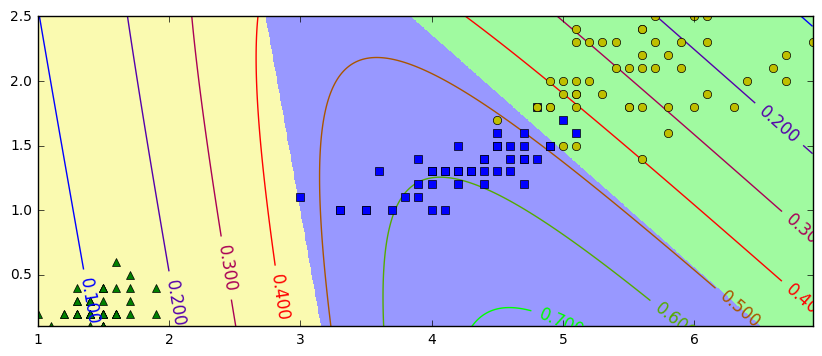

In [199]:
# Plot the orignal data 
plt.figure(figsize = [10,4])
plt.plot(X[y==0,0], X[y==0,1], 'g^', label='group1')
plt.plot(X[y==1,0], X[y==1,1], 'bs', label='group2')
plt.plot(X[y==2,0], X[y==2,1], 'yo',label='group3')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

In [203]:
accuracy(X_test, theta, y_test)

1.0